In [1]:
import numpy as np
from matplotlib import pyplot as plt

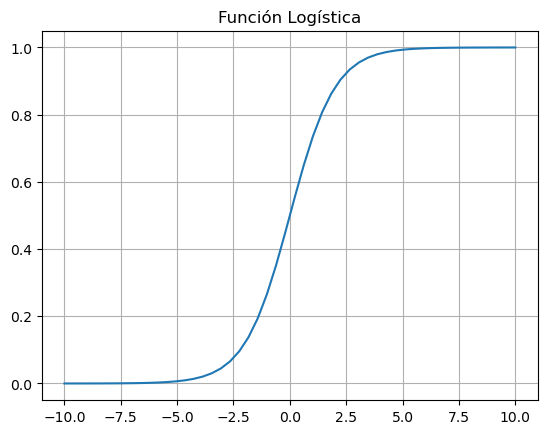

In [2]:
x = np.linspace(-10,10)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.title('Función Logística')
plt.grid()
plt.axis
plt.show()

## Transformar un problema de regresión en un problema de clasificación

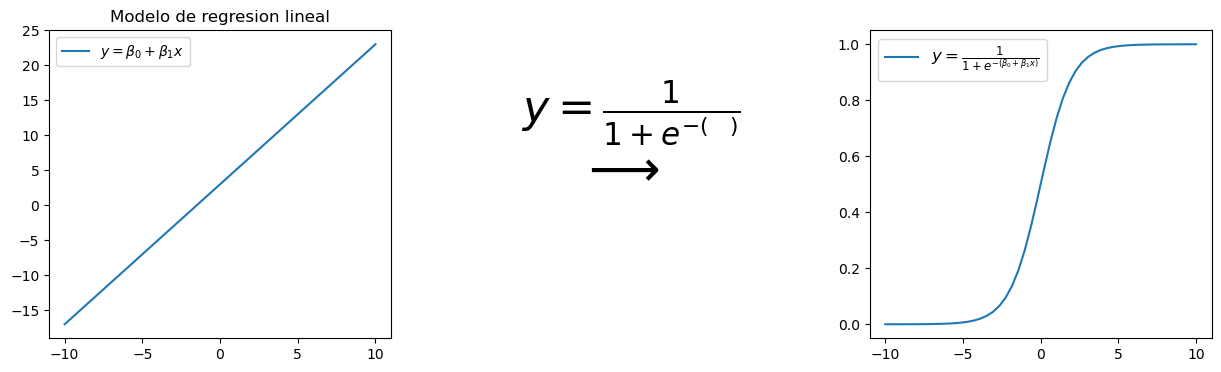

In [3]:
x = np.linspace(-10,10)
a,b = 3,2
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
y1 = a + b*x
plt.plot(x,y1, label = r'$y=\beta_0 + \beta_1 x$')
plt.title('Modelo de regresion lineal')
plt.legend()
plt.subplot(1,3,2)
plt.text(0.18, 0.7, r'$y = \frac{1}{1+e^{-( \quad)}}$', fontsize=32)
plt.text(0.35, 0.5, r'$\longrightarrow$', fontsize=36)
plt.axis('off')
plt.subplot(1,3,3)
y2 = 1/(1+np.exp(-x))
plt.plot(x,y2, label= r'$y=\frac{1}{1+e^{-(\beta_0 + \beta_1 x)}}$')
plt.legend(fontsize='large')
plt.show()

# PRACTICA

### El siguiente conjunto de datos contiene informacion sobre las visitas de un sitio web, en el se registran las siguientes caracteristicas:

1) Tiempo de conexión
2) Cantidad de pag visitadas durante la sesion
3) Cantidad de acciones del usuario (click, scroll, uso de checkbox, sliders, etc)
4) Suma del valor de las acciones (cada accion lleva asociada una valoración de importancia)
5) S.O. que usa: 0- Windows, 1- Mac, 2- Linux

In [4]:
import pandas as pd

In [5]:
dataset= pd.read_csv('data/usuarios_win_mac_lin.csv')

In [6]:
dataset.head(10)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
5,125.0,5,10,20,2
6,133.0,2,2,4,2
7,162.0,2,6,12,2
8,170.0,2,4,8,2
9,217.0,2,6,6,2


In [7]:
# Numero de clases

In [8]:
print(dataset.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


/var/folders/fw/spd4qvkd3n34nsd9j7k2skth0000gn/T/ipykernel_934/3631694728.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop(['clase'],1).hist()


<Figure size 1700x500 with 0 Axes>

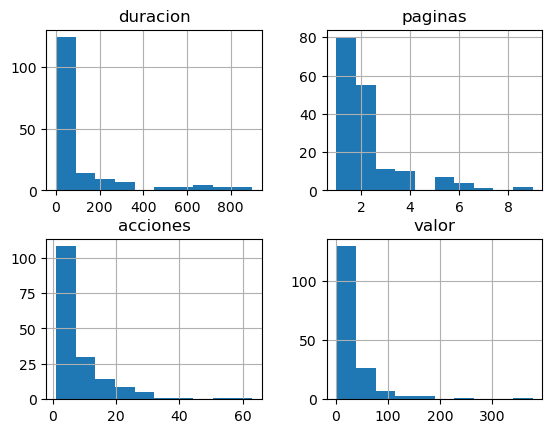

In [9]:
plt.figure(figsize=(17,5))
dataset.drop(['clase'],1).hist()
plt.show()

## Modelo

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
modelo_RL = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)

In [12]:
X = dataset.drop('clase', axis=1)

In [13]:
Y = dataset['clase']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=.80, random_state=1)

In [16]:
modelo_RL.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Predicción del modelo

In [17]:
prediccion = modelo_RL.predict(X_test)

## Evaluación del modelo

In [18]:
print('Matriz de confusion :\n', metrics.confusion_matrix(y_test,prediccion))

Matriz de confusion :
 [[11  0  2]
 [ 9  1  0]
 [ 2  0  9]]


In [19]:
print('Tasa de acierto: {:4f}'.format(metrics.accuracy_score(y_test,prediccion)))

Tasa de acierto: 0.617647


In [20]:
print("Reporte de clasificación:\n")
print(metrics.classification_report(y_test,prediccion))

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.50      0.85      0.63        13
           1       1.00      0.10      0.18        10
           2       0.82      0.82      0.82        11

    accuracy                           0.62        34
   macro avg       0.77      0.59      0.54        34
weighted avg       0.75      0.62      0.56        34

